In [4]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random
import scipy.optimize as optimization

In [ ]:
# https://stackabuse.com/big-o-notation-and-algorithm-analysis-with-python-examples/

In [27]:
def constant_algo(items):
    result = items[0] * items[0]
    return result

%timeit constant_algo([4, 5, 6, 8])

358 ns ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:

import time
n=1000
times =[]
inputs=[]
for i in range(1000,n,500):
    start = time.process_time()
    
    
    
    end =time.process_time()
    times +=[end-start]
    inputs +=[i]
    
    
plt.figure(figsize=(9,3))
plt.xlabel("n")
plt.ylabel('t')

plt.scatter(inputs,times,marker=".")

# fit the data with a linear function
params, cov = optimization.curve_fit(linear_func,inputs,times)
linear_fit =[]

for x in inputs:
    linear_fit += [linear_func(x,params[0],params[1])]
    
plt.plot(inputs,linear_fit,color='red');

In [34]:
def linear_algo(items):
    for item in items:
        return item

items=range(5,10000,500)

print(linear_algo(items))

%timeit linear_algo(items)

5
167 ns ± 10 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [35]:
def linear_algo(items):
    for item in items:
        return item

    for item in items:
        return item
    
%timeit linear_algo(items)

152 ns ± 4.85 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


* In the above script, irrespective of the input size, or the number of items in the input list items, the algorithm performs only 2 steps: Finding the square of the first element and printing the result on the screen. Hence, the complexity remains constant.

In [5]:
def linear_func(x,a,b):
    return a*x+b

In [ ]:
def search_list(nums, target_num):
   
    min_index = 1
    max_index = len(nums)
    while min_index <= max_index:
        middle_index = (min_index + max_index) // 2
        if target_num == nums[middle_index]:
            return middle_index
        elif target_num > nums[middle_index]:
            min_index = middle_index + 1
        else:
            max_index = middle_index - 1
    return -1

In [ ]:
import time


n=10000
times =[]
inputs=[]
for i in range(10000,n,500):
    start = time.process_time()
    factorial(i)
    end =time.process_time()
    times +=[end-start]
    inputs +=[i]
    
    
plt.figure(figsize=(9,3))
plt.xlabel("n")
plt.ylabel('t')

plt.scatter(inputs,times,marker=".")

# fit the data with a linear function
params, cov = optimization.curve_fit(linear_func,inputs,times)
linear_fit =[]

for x in inputs:
    linear_fit += [linear_func(x,params[0],params[1])]
    
plt.plot(inputs,linear_fit,color='red');

In [ ]:
## searches for an item in a list
lst = list(range(1_000_000))
def contains(lst, x):
    for y in lst:
        if x == y: return True
    return False
ns = np.linspace(10, 10_000, 100, dtype=int)
# red plots
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'or')
# line of best fit for red plots
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')
# blue plots
ts = [timeit.timeit('contains(lst, -1)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'ob')
# line of best fit for blue plots
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b');

In [ ]:
# https://cs61a.org/study-guide/orders-of-growth/

In [15]:
def is_prime(n):
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

t=%timeit is_prime(1000)
t

398 ns ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


* Linear.

* Explanation: In the worst case, n is prime, and we have to execute the loop n - 2 times. Each iteration takes constant time (one conditional check and one return statement). Therefore, the total time is (n - 2) x constant, or simply linear. 

ValueError: `ydata` must not be empty!

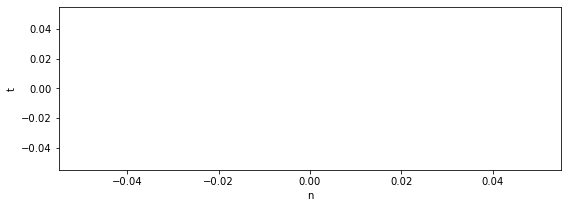

In [10]:
import time


n=10000
times =[]
inputs=[]
for i in range(10000,n,500):
    start = time.process_time()
    
    end =time.process_time()
    times +=[end-start]
    inputs +=[i]
    
    
plt.figure(figsize=(9,3))
plt.xlabel("n")
plt.ylabel('t')

plt.scatter(inputs,times,marker=".")

# fit the data with a linear function
params, cov = optimization.curve_fit(linear_func,inputs,times)
linear_fit =[]

for n in inputs:
    linear_fit += [is_prime(n)]
    
plt.plot(inputs,linear_fit,color='red');

In [23]:
def bar(n):
    i, sum = 1, 0
    while i <= n:
        sum += biz(n)
        i += 1
    return sum

def biz(n):
    i, sum = 1, 0
    while i <= n:
        sum += i**3
        i += 1
    return sum

print( bar(20),biz(40))
%timeit bar(20)
%timeit biz(40)

882000 672400
201 µs ± 56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
17 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* Quadratic.

* : The body of the while loop in bar is executed n times. Each iteration, one call to biz(n) is made. Note that n never changes, so this call takes the same time to run each iteration. Taking a look at biz, we see that there is another while loop. Be careful to note that although the term being added to sum is cubed (i**3), i itself is only incremented by 1 in each iteration. This tells us that this while loop also executes n times, with each iteration taking constant time, so the total time of biz(n) is n x constant, or linear. Knowing that each call to biz(n) takes linear time, we can conclude that each iteration of the while loop in bar is linear. Therefore, the total runtime of bar(n) is quadratic.



In [12]:
def bonk(n):
    sum = 0
    while n >= 2:
        sum += n
        n = n / 2
    return sum

%timeit bonk(20)

815 ns ± 70.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


* ϴ(log(n)). As we increase the value of n, the amount of time needed to evaluate a call to bonk scales logarithmically. Let's use the number of iterations of our while loop to illustrate an example. When n = 1, our loop iterates 0 times. When n = 2, our loop iterates 1 time. When n = 4, we have 2 iterations. And when n = 8, a call to bonk(8) results in 3 iterations of this while loop. As the value of the input scales by a factor of 2, the number of iterations increases by 1. This helps indicate that this function has logarithmic runtime.

In [ ]:
#https://www.happycoders.eu/algorithms/big-o-notation-time-complexity/#O1_-_Constant_Time